In [ ]:
# from pymongo import MongoClient
# import gensim 
# import pandas as pd  
# import numpy as np 


# client = MongoClient('localhost', 27017)
# db = client['']

# tweets = pd.DataFrame(list(db[''].find()))

# data = pd.DataFrame(columns=['Tweets'])
# data['Tweets'] = tweets['text']
# data['Id'] = tweets['_id']
# data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
# user = list()
# for i in range(0,len(tweets)):
#     user.append(tweets['user'][i]['name'])
# data['user'] = np.array(user)

In [ ]:
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from utils import tokenize_and_stem

# docs = data['Tweets']

# myStopWords=set(stopwords.words('italian')
#                 +stopwords.words('english')+
#                 list(['http','abbiat', 'abov', 'anch', 'avess', 'avest', 'avet', 'avev', 'avrebb',
#                       'avrest', 'avret', 'avut', 'becaus', 'befor', 'could', 'doe', 'dure', 'ebb',
#                       'erav', 'facciat', 'facess', 'facest', 'facev', 'farebb', 'farest', 'faret',
#                       'foss', 'fost', 'might', 'must', 'need', 'nostr', 'onc', 'onli', 'ourselv',
#                       'qual', 'quant', 'quell', 'quest', 'sarebb', 'sarest', 'saret', 'siat',
#                       'siet', 'starebb', 'starest', 'staret', 'stavat', 'stess', 'stest', 'stett',
#                       'stiat', 'themselv', 'thi', 'veri', 'vostr', 'would', 'yourselv','becau','http']))

# tagged_data = [TaggedDocument(words=tokenize_and_stem(_d,stopwords=myStopWords), tags=[str(i)]) for i, _d in enumerate(docs)]

In [ ]:
# model = Doc2Vec(vector_size=100, dbow_words= 1, dm=0,  window=5, seed=1337, min_count=5, workers=4,alpha=0.025, min_alpha=0.025)
# model.build_vocab(tagged_data)
# for epoch in range(10):
#     print("epoch "+str(epoch))
#     model.train(tagged_data, total_examples=len(tagged_data), epochs=1)
#     model.alpha -= 0.002  # decrease the learning rate
#     model.min_alpha = model.alpha  # fix the learning rate, no decay

In [1]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#model from doc2Vec
model = Doc2Vec.load("d2v.model")  # you can continue training with the loaded model!


In [2]:
X = model[model.wv.vocab]

In [ ]:
#HDBSCAN

In [14]:
import hdbscan

hdbs=hdbscan.HDBSCAN(min_cluster_size=200,min_samples=1, cluster_selection_method='leaf')
hdbs.fit_predict(X)

array([-1, -1, -1, ..., -1, -1, -1])

Counter({7: 1682, 8: 1019, 1: 762, 4: 709, 10: 491, 6: 464, 5: 388, 3: 349, 2: 334, 9: 260, 0: 235})


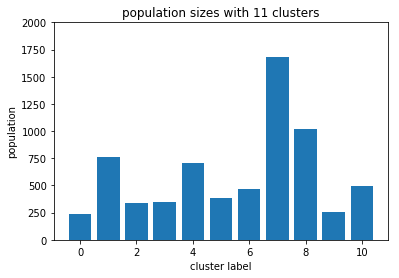

In [15]:
from sklearn.metrics import silhouette_score
import collections
import matplotlib.pyplot as plt
import numpy as np

labels = list(hdbs.labels_)

labels = [x for x in labels if x != -1]

plt.bar(range(len(set(labels))), np.bincount(labels))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(len(set(labels))));

# truncate y axis to see the rest better
plt.ylim(0,2000);

print (collections.Counter(labels))

In [21]:
def get_nwords(cluster, n):
    
    prob=hdbs.probabilities_#tutte prob

    labels_index = [i for i, x in enumerate(labels) if x == cluster]#indice label cluster
        
    cluster_vectors= [X[x] for x in labels_index]#vettori cluster

    cluster_probabilities = [prob[x] for x in labels_index]#probabilità cluster
    
    words={}
    
    for t in range(0,n-1):
        largest_prob = max(cluster_probabilities)
        largest_prob_index = cluster_probabilities.index(largest_prob)
        cluster_probabilities.remove(largest_prob)
        word=model.wv.index2entity[largest_prob_index]
        words[word]=largest_prob
        
    return words
    

    
def describe_clusters(clusterer,num_words):
    
    labels = list(hdbs.labels_)
    labels = [x for x in labels if x != -1]
    
    num_clusters = len(set(labels))
    
    for n in range(0, num_clusters):
        
        print('\n Cluster',n,': ',get_nwords(n,num_words))

In [27]:
describe_clusters(hdbs,7)


 Cluster 0 :  {'great': 1.0, 'video': 1.0, 'best': 1.0, 'live': 1.0, 'take': 1.0, 'many': 1.0}

 Cluster 1 :  {'know': 1.0, 'back': 1.0, 'last': 1.0, 'happy': 1.0, 'week': 1.0, 'many': 1.0}

 Cluster 2 :  {'trump': 1.0, 'world': 1.0, 'great': 1.0, 'think': 1.0, 'year': 1.0, 'president': 1.0}

 Cluster 3 :  {'great': 1.0, 'make': 1.0, 'year': 1.0, 'made': 1.0, 'also': 1.0, 'change': 1.0}

 Cluster 4 :  {'people': 1.0, 'http': 1.0, 'could': 1.0, 'police': 1.0, 'watch': 1.0}

 Cluster 5 :  {'video': 1.0, 'make': 1.0, 'could': 1.0, 'donald': 1.0, 'america': 1.0, 'vote': 1.0}

 Cluster 6 :  {'company': 1.0, 'https': 0.0}

 Cluster 7 :  {'today': 1.0, 'could': 1.0, 'work': 1.0, 'black': 1.0, 'game': 1.0}

 Cluster 8 :  {'could': 1.0, 'stories': 1.0, 'service': 1.0, 'listen': 1.0, 'group': 1.0, 'friend': 1.0}

 Cluster 9 :  {'thanks': 1.0, 'still': 1.0, 'going': 1.0, 'year': 1.0, 'work': 1.0, 'times': 1.0}

 Cluster 10 :  {'https': 1.0, 'years': 1.0, 'morning': 1.0, 'game': 1.0, 'might': 1.0